In [1]:
%pylab inline
import pandas as pd
from crystal import crystal

!phenix.fmodel 1ubq.pdb high_resolution=1.5 format=cns label=FOBS type=complex

Populating the interactive namespace from numpy and matplotlib

phenix.fmodel: a tool to compute structure factors, Fmodel:

  Fmodel = scale * exp(AnisoScale) * (Fcalc + k_sol * exp(-b_sol*s^2/4) * Fmask)

  where:

  - Fmodel - total model structure factor (complex value)
  - AnisoScale = -ht*A(-1)*b_cart*A(-1)th/4
  - h - column vector with Miller indices
  - A - orthogonalization matrix
  - b_cart - anisotropic scale matrix
  - t and (-1) denotes transposition and inversion operations
  - scale - overall scale factor
  - Fcalc - structure factors calculated from atomic model
  - k_sol and b_sol - Flat Bulk solvent model parameters
  - Fmask - structure factors calculated from bulk solvent mask

Usage examples:

  1) phenix.fmodel model.pdb high_resolution=1.5

     will result in a file containing complete set of Fmodel = Fcalc computed
     from atomic model up to 1.5A resolution.

  2) phenix.fmodel model.pdb scale=2 k_sol=0.35 b_sol=50 b_cart="1 2 3 0 4 7" high_res=1.5 low_res=1

In [2]:
F = crystal().read_hkl('1ubq.pdb.hkl')
F

FOBS         PHASE          D
H  K L                                      
0  0 2    798.34300  1.800000e+02  14.475000
     4    184.11000  0.000000e+00   7.237500
     6    228.50800  1.800000e+02   4.825000
     8    437.72900  1.800000e+02   3.618750
     10    73.92960  0.000000e+00   2.895000
     12    69.75230  0.000000e+00   2.412500
     14    11.09190  1.800000e+02   2.067857
     16    83.00530  0.000000e+00   1.809375
     18   108.86400  1.800000e+02   1.608333
   1 1   1196.31000  9.000000e+01  23.974290
     2    333.68600 -9.000000e+01  13.711049
     3     85.52270  9.000000e+01   9.413372
     4    409.46300  9.000000e+01   7.136050
     5    250.16000 -9.000000e+01   5.737663
     6    144.78300  9.000000e+01   4.794587
     7    600.37000  9.000000e+01   4.116514
     8    159.91400  9.000000e+01   3.605866
     9     33.84710 -9.000000e+01   3.207608
     10   147.41300  9.000000e+01   2.888391
     11    47.01520  9.000000e+01   2.626850
     12   217.39700 -9.000000e+01   2.408671
     13   154.25000  9.000000e+01   2.223911
     14   105.11500  9.000000e+01   2.065445
     15   133.86100 -9.000000e+01   1.928038
     16    11.52860 -9.000000e+01   1.807758
     17    33.15270  9.000000e+01   1.701593
     18    10.33260  9.000000e+01   1.607197
     19    24.24270 -9.000000e+01   1.522718
   2 0    703.54900  1.800000e+02  21.385000
     1    169.24900 -3.334570e-14  17.200949
...             ...           ...        ...
32 8 3      7.23388 -1.164800e+02   1.504309
   9 0     31.02190 -3.520730e-14   1.506775
     1     62.08990 -1.831690e+01   1.504738
33 0 1     28.51350  9.000000e+01   1.538429
     2      7.94317  0.000000e+00   1.531954
     3     25.74500 -9.000000e+01   1.521340
     4     23.33990  1.800000e+02   1.506846
   1 0      8.84839  9.000000e+01   1.539608
     1     71.34340  7.229040e+01   1.537435
     2     19.47540  1.155820e+02   1.530972
     3     34.26460 -1.761310e+02   1.520379
     4     51.93850  2.097740e+01   1.505911
   2 0      6.56513 -9.000000e+01   1.536624
     1     15.32880  1.472640e+02   1.534464
     2     36.23460 -1.704650e+02   1.528038
     3     65.71040  8.647350e+01   1.517505
     4     47.14230 -9.793990e+01   1.503119
   3 0     22.63120  9.000000e+01   1.531689
     1     37.02340 -3.759210e+01   1.529550
     2      4.48032  1.460880e+02   1.523185
     3     18.70480 -9.974990e+01   1.512752
   4 0     71.28940 -9.000000e+01   1.524859
     1     33.68650 -6.002860e+01   1.522749
     2     33.27550  3.288240e+01   1.516468
     3      7.68165  1.031050e+02   1.506171
   5 0      1.08746  9.000000e+01   1.516211
     1     61.10530  1.667800e+01   1.514136
     2     20.13920  7.357310e+01   1.507961
   6 0     23.73880  9.000000e+01   1.505839
     1      5.17557  2.114120e+01   1.503806

[10595 rows x 3 columns]

In [3]:
R = np.matmul(np.linalg.inv(F.A), np.array(F.reset_index()[['H', 'K', 'L']], dtype=float).T)
F['A*'] = R[0]
F['B*'] = R[1]
F['C*'] = R[2]
F['R'] = np.linalg.norm(R, 2, 0)

In [4]:
reciprocal_space_distance_matrix = np.linalg.norm(R.T[:,None] - R.T[None,:], 2, 2)

In [5]:
delta_F_frac = np.abs((np.array(F['FOBS']) - np.array(F['FOBS'])[:,None]))/(0.5*(np.array(F['FOBS']) + np.array(F['FOBS'])[:,None]))

(array([ 1870507., 10239932., 19338062., 24725868., 24292786., 17944318.,
         9489250.,  3459334.,   825642.,    68326.]),
 array([0.        , 0.09340537, 0.18681074, 0.28021611, 0.37362148,
        0.46702685, 0.56043222, 0.65383759, 0.74724296, 0.84064833,
        0.9340537 ]),
 <a list of 10 Patch objects>)

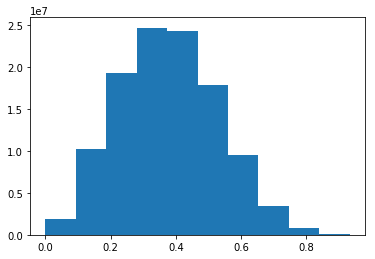

In [6]:
plt.hist(reciprocal_space_distance_matrix.flatten())

In [ ]:
plt.plot(reciprocal_space_distance_matrix.flatten(), delta_F_frac.flatten(), '.k', alpha = 0.01)